## Predicting heart disease using Machine Learning

This notebook looks into using various Python based machine laernning and Data Science libraries in an attempt to build a machine learning mnodel capable of predicting whether or not someone has heart disease based on thier medical attributes...

We are going to take the following approach: 
1. Problem Defination
2. Data
3. Evaluation
4. Features 
5. Modelling 
6. Experimentation 


## 1. Problem Defination 

In a statemnet,
> Given clinical parameters abouat a patient, can we predict whether or not they have herat disease ?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it avalaible on keggle. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset 


## 3. Evaluation 

> If we can 95% accuracy at predicting whether or not a patient has heart disease during the prrof of concept, we 'll pursue the project.


## 4. Features

This is where you will get different infromation about each of the featuress in your data. You can do this via doing your own research(such as looking at this link above) or by talking to a subject matter expert(someone whoc knows about the datasets)

**Create data dictionary**

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* and the label condition/Target : 0 = no disease, 1 = disease

## Preparing the Tools 

We're going to use pandas,matplotlib and numpy for data nalysis and manipulation 

In [1]:
# import all the tools we need 

# Regular EDA(exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

#we want our plots to apper inside the notebook
%matplotlib inline  

# Models from scikit-Leran 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve

## Load Data 

In [2]:
df=pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis (EDA))

The  goal here is to find out more about the data and become a subject matter expert on the data set you are working with.

1. what questios are you trying to solve ?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it ?
4. Where are the outliers and why should you care about them ?
5. How can you add,change or remove features to get more out of you data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target 


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
df["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
#Lets find out how many of each class here
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

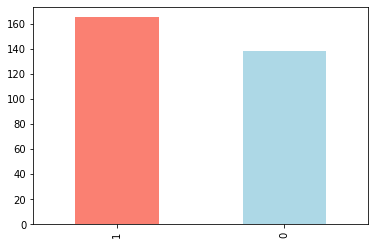

In [9]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
## Heart Disease frequency according tos sex 
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
# Compare target column to sex column 
# pd.crosstab(df.target ,df.sex)
pd.crosstab(df["target"],df["sex"])
           

sex,0,1
target,,
0,24,114
1,72,93


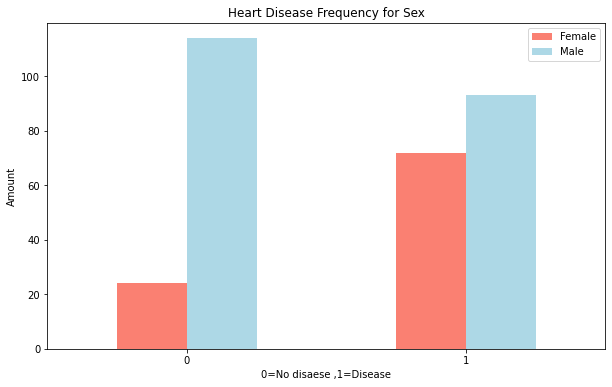

In [15]:
# create a plot of crosstab 
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No disaese ,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);



## Age vs Max Heart Rate(thalach) for Heart Disease




In [16]:


df.thalach.value_counts()


162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [17]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

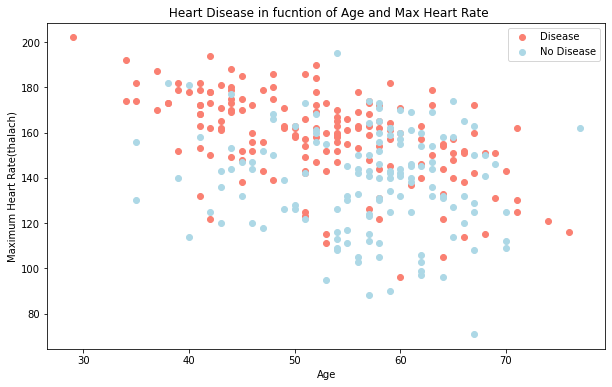

In [18]:
# Create another fif 
plt.figure(figsize=(10,6))

# scatter with postive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon"),


#scatter with negative examples 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some helpful info 
plt.title(" Heart Disease in fucntion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate(thalach)")
plt.legend(["Disease","No Disease"]);

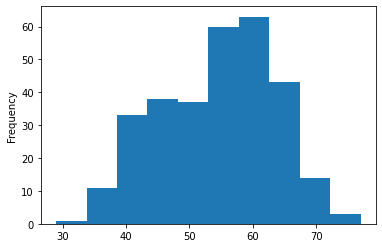

In [19]:
# Check the distribution of the age column with a hisogram(spread of the data)will get outtliers from histogram 
df.age.plot.hist();

### Heart Disease Frequecy per chest pain type

cp: chest pain type:
* Value 0: typical angina(chest pain related decrease blood supply to the heart)
* Value 1: atypical angina(chest pain not related to heart)
* Value 2: non-anginal pain(typically esophageal spasms(not heart related))
* Value 3: asymptomatic(chest pain not showing signs of disease 

In [20]:
pd.crosstab(df.cp,df.target) #row,column

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


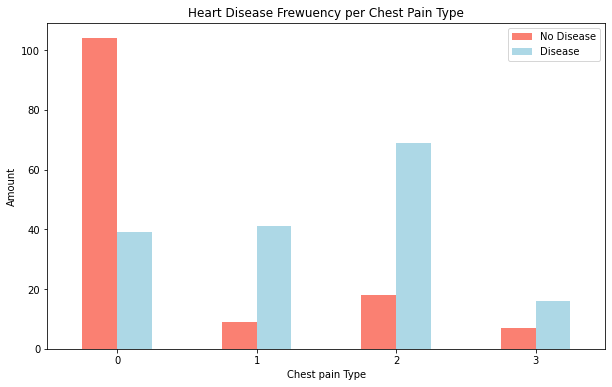

In [21]:
# Make some visauls crosstab 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

# add some comunications 
plt.title("Heart Disease Frewuency per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);


In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# make a correlation matrix 
df.corr()    #which compares each of the columns to each others 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


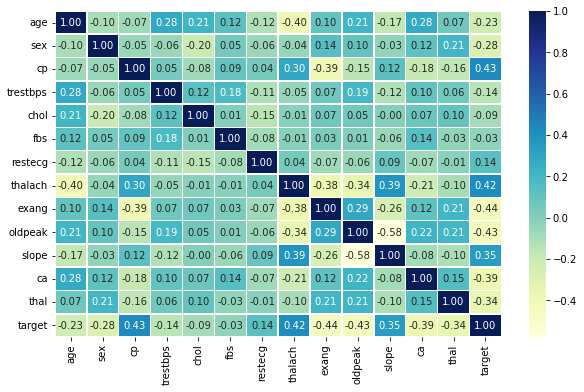

In [24]:
# Lets make a correlation matrix little prettier

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

#if we get our graphs cutting at top or bottom ,due to older version 
# bottom,top=ax.get_ylim()
# ax.set_ylim(bottom+0.5,top-0.5)

In [25]:
# Takeaways 
# if we see raw 3 of cp, we have target value is positive 0.43 , which means cp is depdends on target values , thats how we have correlaction between each col;umns 
# as cp goes up, target values is also increasing
# Higher positive values, positive correlation 
# HIgher Negative values, Negative correlation , decreaseing

## 5. Modelling 

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# SPlit the data in features and lables (x and y)
x=df.drop("target",axis=1)
y=df["target"]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:

y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# split our data into train and test sets
np.random.seed(42)

# split into train and test sets 
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2)

In [30]:

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [31]:
y_train, len(y_train)


(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we have got our data split into train and test sets, its' time to biuld a machine learning model.
We will train it(find the patterns on the training sets)
and we wil test(use the patterns)on the test sets.

We aer going to try 3 different ML Models:
1. logistic regresssion
2. K-Nearest Neighbours
3. RandomForestClassifier





In [32]:
#Put models in dictionary

models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random forest": RandomForestClassifier()}

# Creatte a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dictionary of diffetrent scikit-learn machine learining models
    x_train: Training data(no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels 
  """
      #set random seed
    np.random.seed(42)
    
    # Make a duictionary to keep model scores
    model_scores={}
    
    
    #Loop through models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(x_train,y_train)
        
        #Evaluate model and append its score to model_score
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores

In [33]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                           x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\sheth\Desktop\ml-course\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

# Model comparision


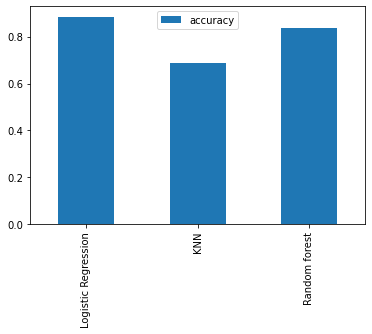

In [34]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare
model_compare.T.plot.bar();

Now we have got baseline model..and we know a model's first predictions aren't always what we should based our next steps off. what should do ? 

Let's look at teh followings:
* Hyperparameter tunning
* Feature Importance
* Confusion materix
* cross-validation
* Precision
* REcall
* F1 score
* Classification REport
* ROC curve
* Area under the curve (AUC


## Hyperparameter Tuning(By Hand)


In [39]:
# Let's Tune KNN

train_scores=[]
test_scores=[]

# craete a list of differtent values for n_neighbors
neighbors=range(1,21)

#set up KNN instance 
knn=KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algoritham
    knn.fit(x_train,y_train)
    
    # Update the training scores list 
    train_scores.append(knn.score(x_train,y_train))
    
    #Update the test scores list 
    test_scores.append(knn.score(x_test,y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [45]:
max(test_scores)

0.7540983606557377

Maximum KNN scopre on the test data: 75.41% 


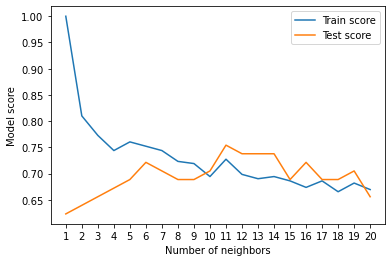

In [50]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
# arange x axis 
plt.xticks(np.arange(1,21,1))

print(f"Maximum KNN scopre on the test data: {max(test_scores)*100:.2f}% ")

## Hyperparameter tunnning with Randomized SearchCV

We are going to Tune:
* LogisticRegression
* randomForestClassifier 

.... using RandomizedSearchCV

In [72]:
# craeate a hyperparameter grid for logisticRegression 

log_reg_grid={"C": np.logspace(-4,4,50),
             "solver":["liblinear"]}

# create a hpyerpasarameter grid fro randomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [73]:
np.logspace(-4,4,50)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

**Now we have got hyperparameters grids setup fro each of our models, 
Now let's tune them using RandomizedSearchCV**

In [74]:
#Tune logisticRegression

np.random.seed(42)

#setup Randomized hyperparameters serach for LogisticRegression 
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit Random hyperparameter serach model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.12648552168552957}

In [76]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

we have only tuned two hyperparamerters , so our score during logicsticregression Hyperparamerters Tunning is not improved much,
we can tune more parameters to get better results 

Now we have tuned Logicstic Regerssion , Lets do the same for randomforestClassisfer()...

In [77]:
#set up random seed
np.random.seed(42)

#setup random hyperparameters search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit Random hyperparamerter serch model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [78]:
#Find the best paramaterters 
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [79]:
#Evaluate the RandomizedSearch RandomForestClassifier model 
rs_rf.score(x_test,y_test)

0.8688524590163934

In [81]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

1. by Hand
2. RandomizedSearchCV
3. GridSearchCv


## Hyperparameters Tunning with GridsearchCV

Since our LogisticRegression model provides the best score so far, we will try and improve them again using GridSearchCV...

In [86]:
# Diffrent Hyperparameters for our LogicsticRegression
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# setupo grid hyperpasrameters search for logisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

# Fit grid hyp[erparameters serach model 
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [88]:
# Check the ebst hyperparametres 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [90]:
# Evaluate the grid search LogisticRegression model 
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine laerning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report 
* Precision
* Recall
* F1-score

....and it would be great if cross validatyion was used where possible.

To Make comparisons and evaluate our trained model, first we need to make predictions.


In [91]:
# make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [92]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

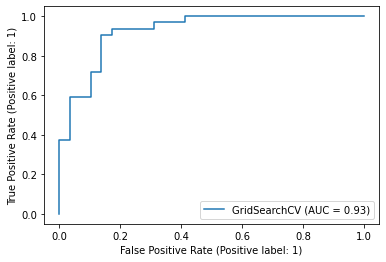

In [93]:
#Import ROC curve function from sklearn.matrics,but we have already imporoted initially 

#Plot ROC curve and calculate AUC matrix
plot_roc_curve(gs_log_reg,x_test,y_test)

In [94]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [96]:
sns   #we have seaborn library

<module 'seaborn' from 'C:\\Users\\sheth\\Desktop\\ml-course\\heart-disease-project\\env\\lib\\site-packages\\seaborn\\__init__.py'>

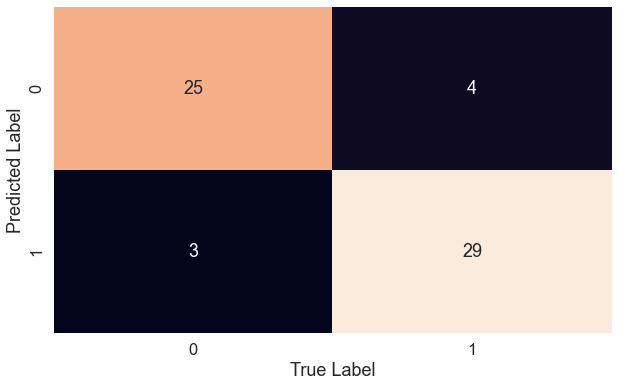

In [102]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    
    #if we have cut-off things then we have to usd followuing code 
#     bottom,top=ax.get.ylim()
#     ax.set_ylim(botto+0.5,top-0.5)


plot_conf_mat(y_test,y_preds)

Now we ahve got a ROC curve, an AUC matrix and a consusion matrix,let's get a classification report as well as cross-valisidated report as well as cross-validated precision ,recall and F1-score.


In [103]:
print(classification_report(y_test,y_preds))    # it been done on test data ,not included cross validation score 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [104]:
# we should pay attention to macro-avg if we have class imbalances, 

## Calculate Evaluation matrics using cross-validatio

we are going to calcualte accuracy,precision,recall and F1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [105]:
# Chech best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [106]:
#Create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [116]:
#cross-validated accuracy 
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [117]:
np_acc=np.mean(cv_acc)   # Re writting it for mean values
np_acc

0.8446994535519124

In [118]:
# Cross-validated precision 
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")

cv_precion=np.mean(cv_precision)
cv_precion


0.8207936507936507

In [119]:
# cross-validated recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")

cv_recall=np.mean(cv_recall)
cv_recall


0.9212121212121213

In [120]:
# cross-validated F1-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")

cv_f1=np.mean(cv_f1)
cv_f1


0.8673007976269721

In [143]:
# Visualize our cross-validated matrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1":cv_f1},
                       index=[0])
                       
cv_metrics

ValueError: Shape of passed values is (5, 4), indices imply (1, 4)

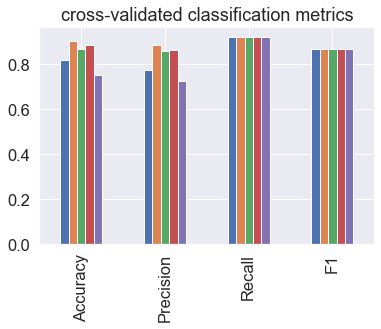

In [144]:
cv_metrics.T.plot.bar(title="cross-validated classification metrics",
                   legend=False);

## Feature Importance 

Feature importance is another way asking ,"which features contributed most to the outcomes of the model and how did they contributed?"

Finding Feature Importance is different ML model.
One way to find feature importance is to search for "(Model name) feature importance"

Lets find features importance for our LogisticRegression model....

In [147]:
#getting best paramerter for GridSerachCV on LogisticRegression model 
gs_log_reg.best_params_



{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [148]:
# Fit an instance of LogisRegression
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [149]:
# Check coef_
clf.coef_    #how coefficient of each column ,contributes to predict label/target values 

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [151]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [150]:
# match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

In [153]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


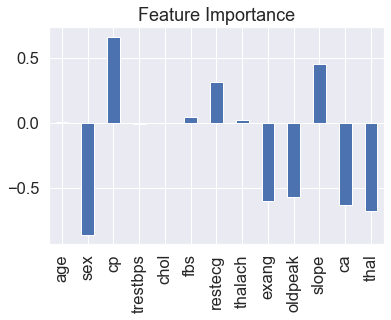

In [156]:
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [157]:
pd.crosstab(df.sex,df.target)   #as sex incearese 0 to 1, cghances of getting heart disease decreases,-ve coefficient 

target,0,1
sex,,
0,24,72
1,114,93


In [159]:
pd.crosstab(df.slope,df.target)   # As slope increases, target is also increases, positive coefficient 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yoyeself....

* could you collect more data ?
* could you try a better model ? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we have done so far)
* If your model is good enough(you have hit your evaluation metrix) how would you export it and share irt with others?


